<a href="https://colab.research.google.com/github/bwsi-hadr/02-visualization-and-shapes-aquabs/blob/master/02_Visualization_and_Shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting and GIS in python
In this lesson we're going to look at how to present data visually. Visualization is a key part of the analysis workflow. It can reveal insights about data, and its relationships to other variables. It is also an integral tool for communicating data and ideas.

We will cover tools for plotting graphs (line, scatter, bar charts, etc), as well as maps (GIS) in this lecture.


# Plotting with matplotlib

Matplotlib is the most widely used package for scientific visualization in python. It has a lot of features, but the documentation can be confusing, and the default styles aren't particularly attractive. Nevertheless, knowing how to use matplotlib is fundamental for data science with python. 

In [0]:
import matplotlib as mpl
from matplotlib import pyplot as plt #pyplot is a subpackage of matplotlib, and provides the interface that we'll use to create plots
plt.style.use('seaborn-whitegrid') # set default visual appearance
import numpy as np

## Matplotlib conventions
There are (confusingly) two different ways to do most things in matplotlib. 

The first is the MATLAB style interface, which functions as a state machine. Commands are run on a global scope and affect the _current_ figure or axis that you're working on. This is convenient for quick plotting without worrying about the fine-grained details of the plot.

The second is the object-oriented interface, which is more "pythonic". Figures and axes are _objects_ which have methods and attributes associated with them for plotting and adjusting their appearance. This provides finer-grained control over the plots.

It's possible to mix and match between the two interfaces, which can cause confusion for new coders trying to learn how matplotlib works. Just remember there are two ways to do most plotting tasks in matplotlib, so if you see things done differently, that's probably the reason.

## Figures and axes
A `Figure` object is a canvas that can hold one or more `Axes` objects. `Axes` are objects which hold the actual plots. (Think of the `Figure` as a piece of paper, and the `Axes` as the actual illustration)

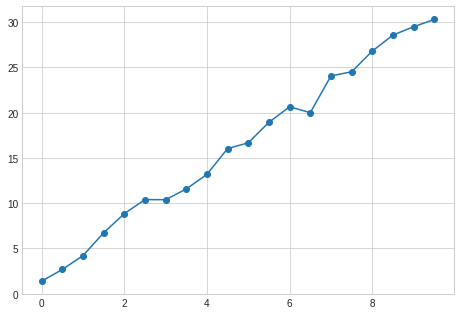

In [2]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # arguments are location of [left, bottom, width, height], where the units are fraction of the figure
x_data = np.arange(0,10,0.5) # points evenly spaced between 0 and 10 with interval of 0.5
y_data = 3*x_data + 2 + 0.8*np.random.randn(len(x_data)) # linear + random noise
ax.plot(x_data, y_data, marker='o') 

### Subplots
Sometimes you want to add multiple plots on the same figure. You can use the `.add_subplot(nrows, ncols, idx)` function of `Figure` to do so.

Subplots are set up in a grid, determined by the arguments `nrows, ncols` of the `.add_subplot` function; the `idx` argument determines the location of the created subplot.

For example, `fig.add_subplot(2,2,3)` creates a 2 $\times$ 2 grid, and the idx value of 3 refers to the bottom left grid element.
```
1 2
3 4
```

In general the indexing convention is left to right on each line:

```
1 2 ... ncols
ncols+1 ... 
2*ncols+1 ...
...
```

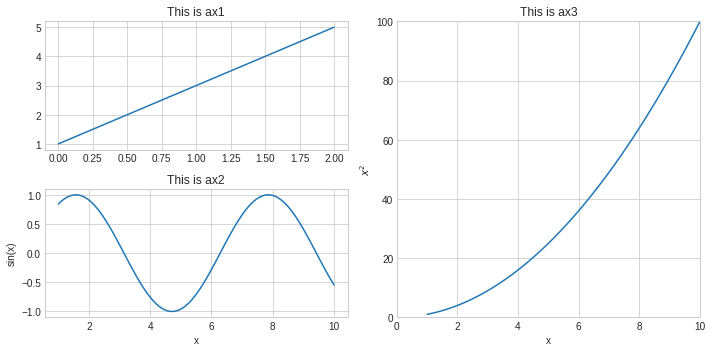

In [3]:
fig = plt.figure(figsize=[10,5]) #figure size, in inches
ax1 = fig.add_subplot(2,2,1) # 
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(1,2,2) # subplots don't all have to be on the same grid

x_data = np.linspace(1,10,100)
ax1.plot([0,2], [1,5]) # simply plots a line from (0,1) to (2,5)
ax2.plot(x_data, np.sin(x_data))
ax3.plot(x_data, x_data**2)

# label each one
ax1.set_title('This is ax1') # sets a title on ax1
ax2.set_title('This is ax2')
ax2.set_xlabel('x') # set xlabel
ax2.set_ylabel('sin(x)') # set ylabel

# it can be more convenient to set all of the labels and limits at once
ax3.set(xlim=(0, 10), ylim=(0, 100),
       xlabel='x', ylabel='$x^2$',
       title='This is ax3'); # encase math in $$ to render exponentiation and other math notation

fig.tight_layout() # a function to clean up the spacing between subplots

### Appearance


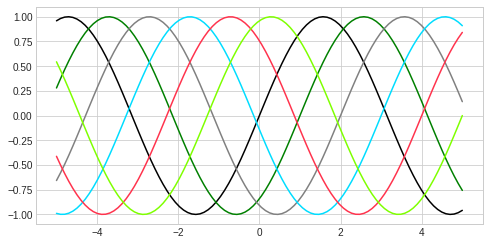

In [4]:
# Change colors of lines
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(1,1,1) # create an axes that covers the whole figure
x = np.linspace(-5,5,100)
ax.plot(x, np.sin(x - 0), color='black')       # specify color by name
ax.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
ax.plot(x, np.sin(x - 2), color='0.5')         # Grayscale between 0 and 1
ax.plot(x, np.sin(x - 3), color='#00DDFF')     # Hex code (RRGGBB from 00 to FF) with FF being max and 00 being min
ax.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
ax.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

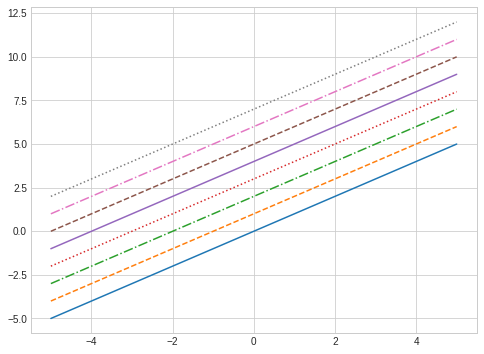

In [5]:
# Change linestyle
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(1,1,1)
ax.plot(x, x + 0, linestyle='solid')
ax.plot(x, x + 1, linestyle='dashed')
ax.plot(x, x + 2, linestyle='dashdot')
ax.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
ax.plot(x, x + 4, linestyle='-')  # solid
ax.plot(x, x + 5, linestyle='--') # dashed
ax.plot(x, x + 6, linestyle='-.') # dashdot
ax.plot(x, x + 7, linestyle=':'); # dotted

There are also [bar charts](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar), [pie charts](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py), among [many others tutorials in the matplotlib documentation](https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py). Check them out for inspiration

## Exercise
Using any data that you looked at earlier this week, make a plot that visualizes some element of your analysis. We'll ask a few people to present their results when they're ready.

Matplotlib can take numpy arrays or pandas series and dataframes as inputs. In addition, pandas dataframes have [a built-in interface to automatically call matplotlib functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). This can be a convenient way to visualize for exploratory analysis. However, it's less customizable, so it may not be suitable for making presentation-quality graphs.

# Shapes and Geometry

For geospatial data analysis, we will be dealing with a lot of geometry. The library that we will be using for geometry is called Shapely.

Shapely is a _planar geometry_ package. Meaning that it is concermed with 2d geometry, making it well suited for representing and analyzing information on maps.

This content is based off of the [Automating GIS Processes course](https://automating-gis-processes.github.io/2018/) from the University of Helsinki

In [0]:
import shapely
from matplotlib import pyplot as plt
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch # will be used to visualize polygons

## Shapely objects
Shapely is a library for representing geometric objects, such as points, lines, and polygons. 
![Fundamental geometric objects that can be used in Python with Shapely](https://automating-gis-processes.github.io/2018/_images/SpatialDataModel.PNG)

The primary classes in Shapely are the `Point`, `LineString`, and `Polygon` classes. Each are represented using 2 or 3-dimensional coordinate tuples (x,y(,z)) 

- `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
- `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

There are also collections of objects, aptly named `MultiPoint`, `MultiLineString`, and `MultiPolygon`. These are, as their names suggest, collections of multiple `Point`, `LineString`, and `Polygon` objects respectively. There also exists a broader class of `GeometryCollection`, which can include objects of any geometry type.


## `Point` objects

`points` require a tuple (2 for 2d, 3 for 3d) to specify their location.

In [7]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)
point3D2 = Point(9.26, -2.456, 0)

# What is the type of the point?
point_type = type(point1)

# Let's examine the objects
print(point1)
print(point3D)
print(type(point1))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


We can see that the type of the point is shapely's `Point` which is represented in a specific format that is based on [GEOS C++ library](https://trac.osgeo.org/geos), which is one of the standard libraries in GIS. 3D-point can be recognized from the capital '`Z`' in front of the coordinates (signifying that there's a 'z' element in the (x,y,z) tuple)


### `Point` class attributes and functions
`Point` objects have some built-in attributes and functions. One of the most useful ones are the ability to extract the coordinates of a Point and calculate the Euclidian distance between points.


In [8]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

In [9]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

# Print out
print("xy variable:\n", xy, "\n")
print("x variable:\n", x, "\n")
print("y variable:\n", y)

xy variable:
 (array('d', [2.2]), array('d', [4.2])) 

x variable:
 2.2 

y variable:
 4.2


In [10]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


In [11]:
import numpy as np
np.sqrt((2.2-7.2)**2 + (4.2+25.1)**2)

29.723559679150142

Note that shapely is planar geometry library, and thus only considers the planar (x,y) coordinates when computing distance. 
Even though `point3D` and `point3D2` have differing `Z` coordinates, they return a planar distance of zero. 

In [12]:
print(point3D)
print(point3D2)
point3D.distance(point3D2)

POINT Z (9.26 -2.456 0.57)
POINT Z (9.26 -2.456 0)


0.0

## LineString Objects
A `LineString` is a sequence of connected line segments. One can be constructed from a list of shapely `Point` objects, or from a list of tuples

In [13]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Print the results
print("line variable: \n", line, "\n")
print("line2 variable: \n", line2, "\n")
print("is line equal to line2: ", line==line2, "\n")
print("type of the line: \n", type(line))

line variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2 variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

is line equal to line2:  True 

type of the line: 
 <class 'shapely.geometry.linestring.LineString'>


### `LineString` class attributes and functions
`LineString` -objects have many useful built-in attributes and functionalities. 

It is, for instance, possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified `Point` and simplify the geometry. See full list of functionalities from [Shapely documentation](https://shapely.readthedocs.io/en/latest/manual.html#geometric-objects). 



In [14]:
# Get list of coordinates
print(list(line.coords))

# Get x and y elements of the line separately (useful for plotting)
lxy = line.xy
print('lxy=',lxy)

# we can separate the outputs into the x and y variables respectively
line_x, line_y = lxy
print('x coordinates: ', line_x)
print('y coordinates: ', line_y)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
lxy= (array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))
x coordinates:  array('d', [2.2, 7.2, 9.26])
y coordinates:  array('d', [4.2, -25.1, -2.456])


We can use matplotlib to plot this `LineString`



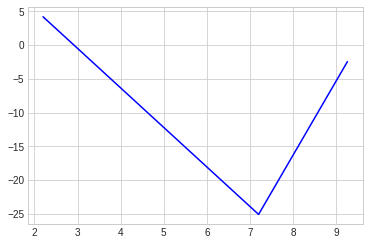

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(line_x, line_y, 'b-') # draw as blue line

There are also many useful attributes of the linestring that we can get automatically:

In [16]:
# Get the length of the line
l_length = line.length
print("Length of our line: {0:.2f}".format(l_length)) # the {0:.2f} notation is a special placeholder for the .format() string function. 
# the curly brackets {} indicate that this should be filled with a variable value. The initial {0} indicates that it should be filled with the first argument of .format()
# the {:.2f} part of the placeholder indicates the formatting. The colon specifies that it is a formatting string, and .2f indicates that it should have 2 digits after the decimal point
# f indicates that it should be numeric (float)

# Get the centroid of all the points in the linestring
l_centroid = line.centroid
print("Centroid of our line: ", l_centroid)

# the centroid is a Point type object
centroid_type = type(l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


We can plot the location of the centroid (average location of all points, equally weighted)

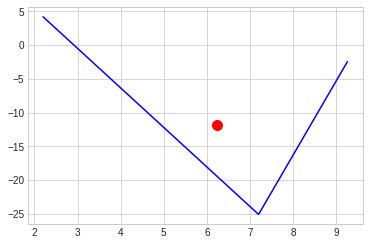

In [17]:
l_centroid_x, l_centroid_y = l_centroid.xy
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(line_x, line_y, 'b-') # draw as blue line
ax.plot(l_centroid_x, l_centroid_y, 'ro', markersize=10)

### Exercise: Compute and plot midpoint of a LineString
The centroid gives the arithmetic average of all of the points in the LineString. However, it is also useful to know where the midpoint of a LineString is. That is, if you were traveling along the LineString from one end to the other, at which point would the distance you've traveled be equal to the distance you have yet to travel.

For this exercise, write a function which takes any valid `LineString` object as an input, outputs the coordinates of the midpoint, and draws a plot of both the LineString and midpoint.

In [0]:
def getMidpoint(line):
  """
  input: line, LineString - any valid shapely LineString object
  output: midpoint, Point - a shapely Point object corresponding to the midpoint of the input LineString
  Also plot the input LineString as well as the midpoint
  """
  # fill this in with your code
  return midpoint

_Note there is an `interpolate` method in shapely that makes this trivial. Try to do it without using it. You can use `interpolate` to check your work._ 

## Polygon object

Creating a `Polygon` -object continues the same logic of how `Point` and `LineString` were created but `Polygon` object only accepts coordinate-tuples as input.

In [19]:
# Create a Polygon from coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2_coords = [(p.x, p.y) for p in [point1, point2, point3]]# using list comprehension to generate a list of coordinates
print('coords from point objects are:', poly2_coords)
poly2 = Polygon(poly2_coords) 
print('poly and poly2 are equal: ', poly == poly2)

coords from point objects are: [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
poly and poly2 are equal:  True


In [0]:
# there are some useful attributes and functions:
x_min, y_min, x_max, y_max = poly.bounds # gives a tuple with the coordinates of a bounding rectangle: (x_min, y_min, x_max, y_max)

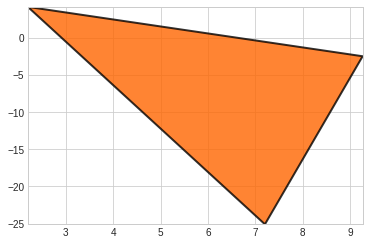

In [21]:
# Plot a polygon
fig = plt.figure()
ax = fig.add_subplot(111)
patch = PolygonPatch(poly2, fc='#FF6600', ec='black', alpha=0.8, linewidth=2) # arguments are PolygonPatch(shapely_polygon, fc=face_color, ec=edge_color, alpha=transparency, **kwargs)
# PolygonPatch creates a matplotlib object, so the matplotlib kwargs will work in general to modify it
ax.add_patch(patch) # puts the patch object on the axes
ax.set(xlim=[x_min, x_max],ylim=[y_min,y_max]) # set limits at bounding polygon coordinates
plt.show()

Polygon objects can have holes in them

In [0]:

# Let's create a big rectangle and put some holes in it

# First we define our exterior
poly_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's first create a single big hole 
# each hole is a list of coordinates.
single_hole = [[(170, 80), (170, -80), (-170, -80), (-170, 80)]]
# There can actually be multiple holes, so the holes should be lists of lists
# hence the double square brackets [[]] for single_hole and double_hole
double_hole = [[(100, 80), (100, -80), (-10, -20), (-10, 20)],[(-20, 30),(-125, -45),(-120, 40)]]

# polygon without a hole
poly_no_holes = Polygon(shell=poly_exterior)

# polygons with holes
poly_with_a_hole = Polygon(shell=poly_exterior, holes=single_hole)
poly_with_holes = Polygon(shell=poly_exterior, holes=double_hole)



[(-95, 95), (-185, 185)]

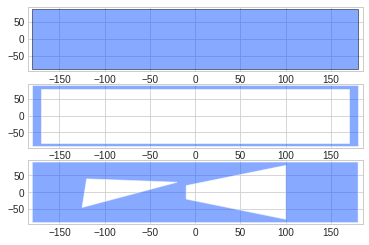

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
patch1 = PolygonPatch(poly_no_holes,fc='#1155FF',alpha=0.5)
ax1.add_patch(patch1)
ax1.set(xlim=[-185,185], ylim=[-95,95])

ax2 = fig.add_subplot(312)
patch2 = PolygonPatch(poly_with_a_hole,fc='#1155FF', ec='#FFFFFF',alpha=0.5)
ax2.add_patch(patch2)
ax2.set(xlim=[-185,185], ylim=[-95,95])

ax3 = fig.add_subplot(313)
patch3 = PolygonPatch(poly_with_holes,fc='#1155FF', ec='#FFFFFF',alpha=0.5)
ax3.add_patch(patch3)
ax3.set(xlim=[-185,185], ylim=[-95,95])

Note there are some constraints about the location of holes within polygons (what's allowed and not allowed). See [the shapely manual](https://shapely.readthedocs.io/en/latest/manual.html#polygons) for details.

Also note that the order of the points which define a hole/polygon matter: If the polygon exterior points are listed counter-clockwise, then the hole should be clockwise (and vice versa). If you don't want to bother dealing with this, you can call
```
polygon_with_holes = shapely.geometry.polygon.orient(polygon_with_holes)
```
to orient it automatically

[(-95, 95), (-185, 185)]

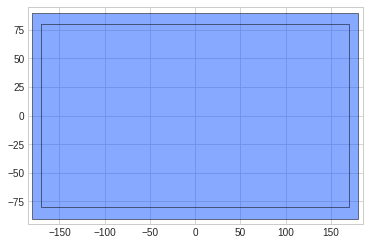

In [24]:
# let's try with the hole oriented incorrectly
single_hole_backwards = [single_hole[0][::-1]] # [::-1] reverses the order of single_hole[0] (we have to use [0] because single_hole is a list of lists)
# recall that the indexing notation `listname[idx_a:idx_b]` is shorthand for "get elements of listname starting at idx_a, going up to (but not including) idx_b"
# Omitting `idx_a` means "start at beginning"; omitting `idx_b` means "go until the end"
# furthermore, you can use `listname[idx_a:idx_b:step_size]` to get every "step_size"-th element
# thus, the index [::-1] means "all elements, but counting backwards by 1"
poly_with_bkw_hole = Polygon(shell=poly_exterior, holes=single_hole_backwards)
fig = plt.figure()
ax1 = fig.add_subplot(111)
patch1 = PolygonPatch(poly_with_bkw_hole,fc='#1155FF',alpha=0.5)
ax1.add_patch(patch1)
ax1.set(xlim=[-185,185], ylim=[-95,95])
# note that the hole is filled incorrectly (not actually a hole!)

[(-95, 95), (-185, 185)]

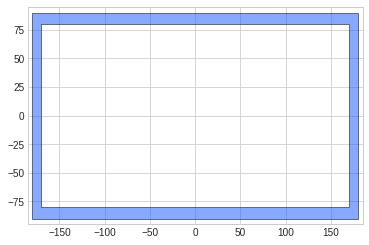

In [25]:
# fix it
poly_with_bkw_hole = shapely.geometry.polygon.orient(poly_with_bkw_hole) # fix the orientation
fig = plt.figure()
ax1 = fig.add_subplot(111)
patch1 = PolygonPatch(poly_with_bkw_hole,fc='#1155FF',alpha=0.5)
ax1.add_patch(patch1)
ax1.set(xlim=[-185,185], ylim=[-95,95])
# all better!

There are many functions associated with shapely objects which can help you create new shapes and do spatial analyses. We will go over a few of them, but you can check them all out in the [shapely manual](https://shapely.readthedocs.io/en/latest/manual.html#spatial-analysis-methods).

`object.buffer(distance)` creates an object that encompasses all of the space `distance` beyond the current boundaries of `object`

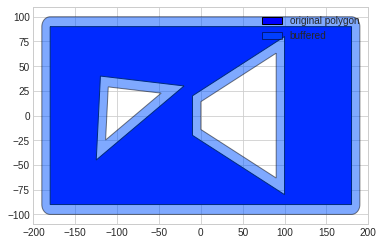

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
patch1 = PolygonPatch(poly_with_holes,fc='#0000FF',alpha=1)
poly_with_buffer = poly_with_holes.buffer(10)
patch2 = PolygonPatch(poly_with_buffer,fc='#0055FF',alpha=0.5)
p1 = ax1.add_patch(patch1)
p2 = ax1.add_patch(patch2)
ax1.set(xlim=[-200,200], ylim=[-110,110])
ax1.legend({'original polygon':p1, 'buffered':p2},loc='best')


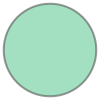

In [27]:
# you can create a circle using a point and buffer
Point(1,1).buffer(10) # creates a point centered at 1,1 with radius 10

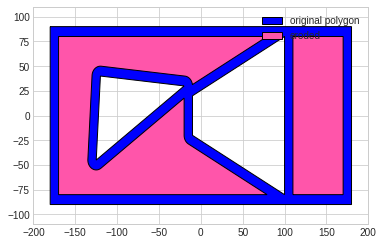

In [28]:
# a negative distance on a buffer can be used to erode a polygon
fig = plt.figure()
ax1 = fig.add_subplot(111)
patch1 = PolygonPatch(poly_with_holes,fc='#0000FF',alpha=1)
poly_eroded = poly_with_holes.buffer(-10)
patch2 = PolygonPatch(poly_eroded,fc='#FF55AA',alpha=1)
p1 = ax1.add_patch(patch1)
p2 = ax1.add_patch(patch2)
ax1.set(xlim=[-200,200], ylim=[-110,110])
ax1.legend({'original polygon':p1, 'eroded':p2},loc='best')

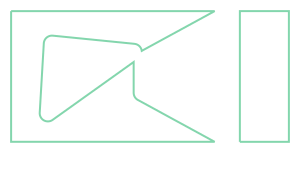

In [29]:
# get the outline of an object with .boundary
poly_eroded.boundary

In [30]:
# length of the boundary
poly_eroded.boundary.length

1714.7439056131875

In [31]:
# get the area of the shape
poly_eroded.area

31298.780262343378

## Geometry Collections
Geometry collections are datatypes that store multiple geometry objects. Much like how lists store multiple individual objects in a larger data structure, collections do the same with shapely objects

In [0]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box


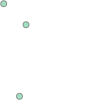

In [33]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])
multi_point

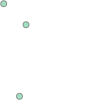

In [34]:
# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
multi_point2

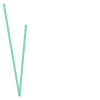

In [35]:
# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])
multi_line

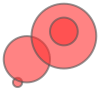

In [36]:
# MultiPolygon can be done in a similar manner
circle1 = Point(0,0).buffer(1)
circle2 = Point(2,5).buffer(5)
circle3 = Point(10,10).buffer(7)
circle4 = Point(10,11).buffer(3)
multi_circle = MultiPolygon([circle1, circle2, circle3, circle4])
multi_circle

## Geometric analysis
Shapely includes a ton of useful functions to analyze [geometric relationships between shapes](https://shapely.readthedocs.io/en/latest/manual.html#predicates-and-relationships).

For example, you can find whether one shape [contains](https://shapely.readthedocs.io/en/latest/manual.html#object.contains) the other within its interior; whether one object [crosses](https://shapely.readthedocs.io/en/latest/manual.html#object.crosses) or [overlaps](https://shapely.readthedocs.io/en/latest/manual.html#object.overlaps) another. _Note that these methods have very precise definitions. For example, `overlaps` and `intersects` are two distinct methods with subtle differences. Refer to the documentation to ensure that you're using the function that you actually want._

In [37]:
# in order for two objects to cross, one must go all the way through the other
circle3.crosses(circle4)

False

In [38]:
# intersect checks if any part of the interior of one object is in the other
circle3.intersects(circle4)

True

In [39]:
# overlap does not allow one object to fully contain the other
circle3.overlaps(circle4)

False

### Set theoretic functions
You can use shapely to do set-theoretic operations, such as intersection, union, and difference

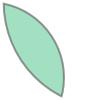

In [40]:
# intersection represents the shape that is part of both objects (logical AND)
circle2.intersection(circle3)

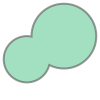

In [41]:
# union is the shape that's part of either object (logical OR)
circle2.union(circle3)

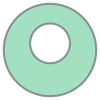

In [42]:
# difference is the part of the shape of one object that's not in the other (logical AND NOT)
circle3.difference(circle4)

In [43]:
# note that the order of difference matters
circle4.difference(circle3) # is empty because circle4 is entirely in circle3

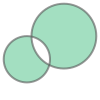

In [44]:
# symmetric difference is the opposite of intersection (logical XOR)
circle3.symmetric_difference(circle2)

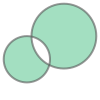

In [45]:
# appropriately, symmetric difference order doesn't matter
circle2.symmetric_difference(circle3)

### Constructive methods
These methods create new objects not derived from set-theoretic analysis.

We've already seen some, such as `.buffer()`

In [0]:
# get the region around a line
buffered_line = LineString([(0,0),(5,5),(-1,5)]).buffer(1)

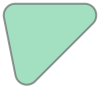

In [47]:
# convex hull is the smallest convex polygon with contains all the points in the objects
buffered_line.convex_hull
# convex hull can be thought of the shape that a rubber band would make if you wrapped it around the outside of the object

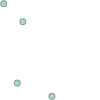

In [48]:
# can work on points also
point4 = Point(20,-30)
MultiPoint([point1, point2, point3, point4])

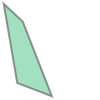

In [49]:
MultiPoint([point1, point2, point3, point4]).convex_hull

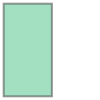

In [50]:
# envelope finds the smallest upright rectangle that contains the object
MultiPoint([point1, point2, point3, point4]).envelope

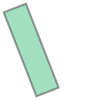

In [51]:
# minimum_rotated_rectangle allows for tilted rectangles
MultiPoint([point1, point2, point3, point4]).minimum_rotated_rectangle

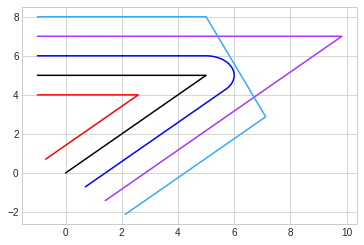

In [52]:
# parallel_offset creates a linestring that's a fixed distance from an object on left or right side
original_line = LineString([(0,0),(5,5),(-1,5)])
offset_line_left = original_line.parallel_offset(1,'left')
offset_line_right_round = original_line.parallel_offset(1,'right',join_style=1)
offset_line_right_sharp = original_line.parallel_offset(2,'right',join_style=2)
offset_line_right_flat = original_line.parallel_offset(3,'right',join_style=3)
plt.plot(original_line.xy[0], original_line.xy[1],'black')
plt.plot(offset_line_left.xy[0], offset_line_left.xy[1],'red')
plt.plot(offset_line_right_round.xy[0], offset_line_right_round.xy[1],'blue')
plt.plot(offset_line_right_sharp.xy[0], offset_line_right_sharp.xy[1],'#AA33FF')
plt.plot(offset_line_right_flat.xy[0], offset_line_right_flat.xy[1],'#33AAFF')


Join styles are documented [here](https://shapely.readthedocs.io/en/latest/manual.html#shapely.geometry.JOIN_STYLE)

### Affine transformations
You can performarbitrary linear transformations of objects (scale, skew, translate, rotate) using the `affine_transformation` function



`affine_transform(geom, matrix_params)` transforms the object geom using the below matrix.
$\begin{split}\begin{bmatrix}
  x' \\
  y' \\
  1
\end{bmatrix} =
\begin{bmatrix}
  a & b & x_\mathrm{off} \\
  d & e & y_\mathrm{off} \\
  0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
  x \\
  y \\
  1
\end{bmatrix}\end{split}$

 Where `matrix_params` is a 6-tuple or list with entries
`[a, b, d, e, x_off, y_off]`
where:
- `a` represents the scaling factor in the x direction
- `b` represents the shearing factor in the x direction
- `d` represents the shearing factor in the y direction
- `e` represnts the scaling factor in the y direction
- `x_off` represents the offset (translation) amount in the x direction
- `y_off` represents the offset (translation) amount in the y direction

In [0]:
from shapely.affinity import affine_transform, rotate, skew, scale, translate

`affine_transformation` is very powerful, but it can be complicated to figure out the parameters by hand. Fortunately, common transformations have built-in functions:
- [rotate](https://shapely.readthedocs.io/en/latest/manual.html#shapely.affinity.rotate)
- [scale](https://shapely.readthedocs.io/en/latest/manual.html#shapely.affinity.scale)
- [skew](https://shapely.readthedocs.io/en/latest/manual.html#shapely.affinity.skew)
- [translate](https://shapely.readthedocs.io/en/latest/manual.html#shapely.affinity.translate)

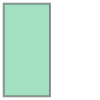

In [54]:
rect = Polygon([(0,0),(1,0),(1,2),(0,2)])
rect

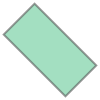

In [55]:
#rotate square by 45 degrees counter-clockwise (right hand rule determines direction)
rotate(rect,45) 

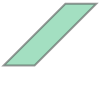

In [56]:
skew(rect, 45)

The usage for skew is:

`shapely.affinity.skew(geom, xs=0.0, ys=0.0, origin='center', use_radians=False)`

where `xs` is the skew in the x direct, and `ys` is in the y direction

# Exercises

## Visualizing hurricane cone of uncertainty

This is a common way of visualizing the possible hurricane paths. Thousands of simulations are run to forecast where the hurricane might be for each time step in the future. The larger circles the further out into the future we go represent the greater uncertainty about where the hurricane might be (not the actual size or power of the hurricane)
![hurricane cone](https://www.weathernationtv.com/app/uploads/2016/10/C-Path-e1475672445449.jpg)

In this exercise, you'll be given a set of forecasted locations for each time step in the future. Your job is to create an object that joins them together to create this style of continuous cone.

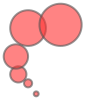

In [57]:
forecast1 = Point(0,0).buffer(0.3)
forecast2 = Point(-1,1.3).buffer(0.5)
forecast3 = Point(-2.2,2.4).buffer(1)
forecast4 = Point(-2.5,4.6).buffer(1.5)
forecast5 = Point(-1,8.1).buffer(2.2)
forecast6 = Point(3,8.5).buffer(2.6)

all_forecasts = MultiPolygon([forecast1,
                              forecast2,
                              forecast3,
                              forecast4,
                              forecast5,
                              forecast6])
all_forecasts

## Creating common logos
Many logos and designs are made of simple geometric shapes. For example, twitter's is entirely made from circles of different diameters.
![alt text](https://shkspr.mobi/blog/wp-content/uploads/2017/05/TwitterCircles.jpg)

Find an interesting logo that can be made with geometric shapes. Create it using shapely and plot it using matplotlib. As a bonus, try to match the colors as well!

In [71]:
outer=Point(1,1).buffer(1000)

x_min, y_min, x_max, y_max = outer.bounds
print(x_min, y_min, x_max, y_max)

-999.0 -999.0 1001.0 1001.0


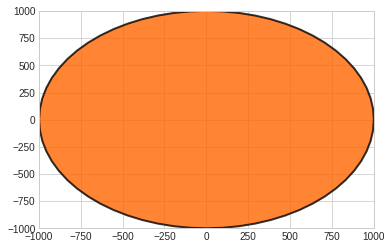

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
patch = PolygonPatch(outer, fc='#FF6600', ec='black', alpha=0.8, linewidth=2) # arguments are PolygonPatch(shapely_polygon, fc=face_color, ec=edge_color, alpha=transparency, **kwargs)
# PolygonPatch creates a matplotlib object, so the matplotlib kwargs will work in general to modify it
ax.add_patch(patch) # puts the patch object on the axes
ax.set(xlim=[x_min, x_max],ylim=[y_min,y_max]) # set limits at bounding polygon coordinates
plt.show()